In [1]:
# Justin McClain
# CS 664 Artificical Intelligence
# Mod 1 Assignment 1
# Mesa starter level simulated agent based economy tutorial
# https://mesa.readthedocs.io/en/latest/tutorials/intro_tutorial.html

In [2]:
# Import dependencies (Mesa, Matplotlib, jupyter installed locally)

import mesa

# Data visualization tools.
import seaborn as sns

# Has multi-dimensional arrays and matrices. Has a large collection of
# mathematical functions to operate on these arrays.
import numpy as np

# Data manipulation and analysis.
import pandas as pd

In [68]:
class MoneyAgent(mesa.Agent):
    """An agent with fixed initial wealth."""
    
    def __init__(self, unique_id, model, wealthProportion):
        # initialize wealth proportion variable from param
        self.wealthProportion = wealthProportion

        # Create the agent's variable and set the initial values.
        super().__init__(unique_id, model)

        # Initialize wealth with a random value for diversity
        self.wealth = self.random.randint(1, 10)

        # for plague sim
        # start off not infected
        self.infected = False
        
        # Increase immunity in direct proportion to wealth
        self.immunity = 1 + (50 * self.wealth)
        
        # Set contacts as a fixed value for all agents
        self.contacts = 5

    def step(self):
        # Transfer wealth action based on agent's current wealth
        if self.wealth > 0:
            other_agent = self.random.choice(self.model.schedule.agents)
            if other_agent and other_agent != self:
                transfer_amount = self.wealthProportion * self.wealth
                other_agent.wealth += transfer_amount
                self.wealth -= transfer_amount

        # Infection action
        if not self.infected:
            contacts_infected = sum([1 for other in self.model.schedule.agents if other.infected and np.random.rand() < (1.0 / self.contacts)])
            infection_chance = contacts_infected / (self.immunity + contacts_infected)  # Adjusted formula

            if np.random.rand() < infection_chance:
                self.infected = True


In [69]:
class MoneyModel(mesa.Model):
    """A model with some number of agents."""

    def __init__(self, N, wealthProportion):
        self.num_agents = N
        # Create scheduler and assign it to the model
        self.schedule = mesa.time.RandomActivation(self)
        
        # Create wealth proportion variable for use in MoneyAgent
        self.wealthProportion = wealthProportion
        
        # Create agents
        for i in range(self.num_agents):
            a = MoneyAgent(i, self, self.wealthProportion)
            if np.random.rand() < 0.05:  # 5% of the population is initially infected
                a.infected = True
            # Add the agent to the scheduler
            self.schedule.add(a)

    def step(self):
        """Advance the model by one step."""

        # The model's step will go here for now this will call the step method of each agent and print the agent's unique_id
        self.schedule.step()
        

In [70]:
# import matplot for graph
# For a jupyter notebook add the following line:
%matplotlib inline

# The below is needed for both notebooks and scripts
import matplotlib.pyplot as plt

C:\Users\mcjst\AppData\Roaming\Python\Python311\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\mcjst\AppData\Roaming\Python\Python311\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\mcjst\AppData\Roaming\Python\Python311\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


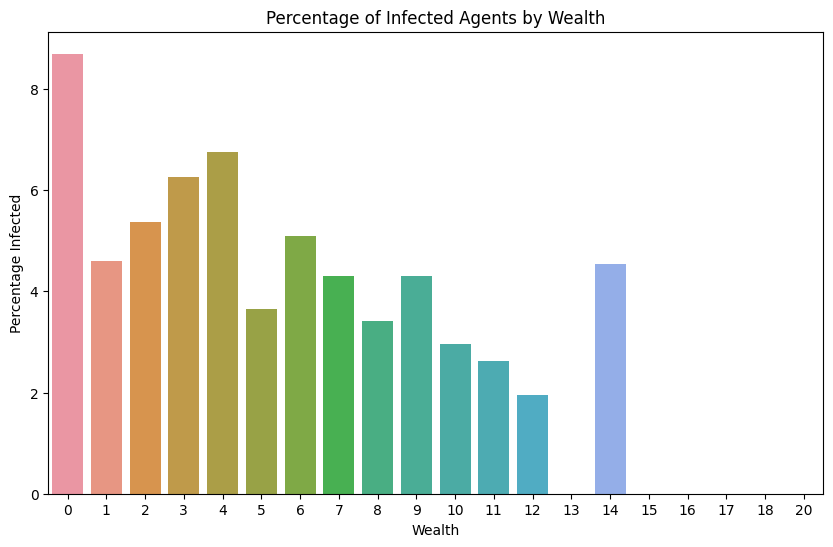

In [71]:
all_wealth = []
all_infected = []

for j in range(500):
    #set the wealth distribution to 30% to create more wealthy
    model = MoneyModel(10, 0.30)
    for i in range(10):

        model.step()

    # Store the results
    for agent in model.schedule.agents:
        all_wealth.append(agent.wealth)
        all_infected.append(agent.infected)

# Convert lists to DataFrame
data = pd.DataFrame({
    'Wealth': all_wealth,
    'Infected': all_infected
})

data['Wealth'] = data['Wealth'].astype(int)

# Group by 'Wealth' and count the number of infected agents for each wealth level
grouped = data.groupby('Wealth').Infected.value_counts().unstack().fillna(0)

# Calculate the percentage of infected agents
grouped['Percentage Infected'] = (grouped[True] / (grouped[True] + grouped[False])) * 100

# Plot
plt.figure(figsize=(10, 6))
g = sns.barplot(x=grouped.index, y='Percentage Infected', data=grouped, width=0.8)

g.set(title="Percentage of Infected Agents by Wealth", xlabel="Wealth", ylabel="Percentage Infected")
plt.show()
